In [20]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

In [21]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["bp_smo_canceled", "margin", "w_kmeans",10, 30, 0.01, "Adam"])
print(len(runs_bp_smo))
run_ids_smo = get_run_ids(runs_bp_smo)
max(runs_bp_smo['metrics.acc'])

10


0.6138

In [22]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate"],[True, True, True, True, True],["bp_lmo_canceled", "margin", "w_kmeans", 30, 0.01])
print(len(runs_bp_lmo))
run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
max(runs_bp_lmo['metrics.acc'])

10


0.6002

In [23]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["centroids", "margin", "w_kmeans",1000, 30, 0.01, "Adam"])
print(len(runs_centroids))
run_ids_centroids = get_run_ids(runs_centroids)
max(runs_centroids['metrics.acc'])

10


0.624

In [24]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True, True],["bp_prop_clustersize", "margin", "w_kmeans",1000, 30, 0.01, 10])
print(len(runs_bp_clusterwise))
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
max(runs_bp_clusterwise['metrics.acc'])

10


0.6127

In [25]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters"],[True, True, True, True, True, True, True],["boundary_points", "margin", "w_kmeans",1000, 0.01, 30, 10])
print(len(runs_boundary))
run_ids_boundary = get_run_ids(runs_boundary)
max(runs_boundary['metrics.acc'])

10


0.5965

In [26]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
run_ids_random = get_run_ids(runs_random)
max(runs_random['metrics.acc'])

10


0.607

In [10]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)

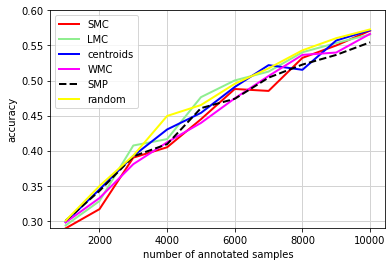

In [11]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

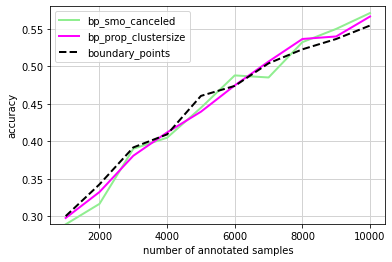

In [12]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [13]:
print(f'bp_smo: {avg_accs_bp_smo}')
print(f'bp_lmo: {avg_accs_bp_lmo}')

bp_smo: [0.28926 0.31661 0.39005 0.40483 0.44475 0.48791 0.48515 0.53225 0.54995
 0.57108]
bp_lmo: [0.29346 0.32811 0.40733 0.41645 0.47624 0.50011 0.51274 0.54026 0.55348
 0.56561]


In [14]:
avg_accs_centroids

array([0.29816, 0.34472, 0.39248, 0.43019, 0.4538 , 0.49076, 0.52191,
       0.51525, 0.55704, 0.57167])

In [15]:
avg_accs_clusterwise

array([0.29773, 0.33241, 0.38074, 0.41191, 0.43949, 0.47457, 0.50641,
       0.5365 , 0.53987, 0.56646])

In [16]:
avg_accs_bp_lmo

array([0.29346, 0.32811, 0.40733, 0.41645, 0.47624, 0.50011, 0.51274,
       0.54026, 0.55348, 0.56561])

In [17]:
avg_accs_bp_smo

array([0.28926, 0.31661, 0.39005, 0.40483, 0.44475, 0.48791, 0.48515,
       0.53225, 0.54995, 0.57108])

In [18]:
avg_accs_boundary

array([0.30021, 0.34261, 0.39185, 0.40927, 0.46058, 0.47391, 0.50406,
       0.5227 , 0.53649, 0.55444])

In [19]:
avg_accs_random

array([0.30021, 0.34958, 0.39294, 0.44946, 0.46501, 0.49528, 0.51731,
       0.543  , 0.56033, 0.57283])